#Step 1: Import Data



##1.1 Import packages


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import gc #Garbage Collector to free up memory
gc.enable

<function gc.enable>

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
import pandas as pd
new_features = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/new_features.csv'))

Memory usage of dataframe is 2030.63 MB
Memory usage after optimization is: 596.50 MB
Decreased by 70.6%


1.2 Load Data

In [ ]:
orders = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/orders.csv'))

Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 45.68 MB
Decreased by 75.0%


In [ ]:
order_products__train = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/order_products__train.csv'))

Memory usage of dataframe is 42.26 MB
Memory usage after optimization is: 13.20 MB
Decreased by 68.7%


#3.Split into Train and Test DataFrame

In [ ]:
new_features.shape

(13307953, 20)

In [ ]:
new_features.head()

,Unnamed: 0,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899


In [ ]:
new_features = new_features.drop(['Unnamed: 0'], axis=1)

In [ ]:
new_features.head()

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899


##3.1Create Train DataFrame


In [ ]:
#Filter eval_set for just train to create the train DataFrame
new_features_train = reduce_mem_usage(new_features[new_features.eval_set=='train'])
new_features_train.head(n=10)

Memory usage of dataframe is 412.19 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Memory usage after optimization is: 412.19 MB
Decreased by 0.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899
5,1,13176,2,0.222168,0.0,59,18,19.0,11,5.363281,10,0.694824,379450,315913.0,0.832520,24,4,train,1187899
6,1,14084,1,0.099976,0.0,59,18,19.0,11,5.363281,10,0.694824,15935,12923.0,0.811035,91,16,train,1187899
7,1,17122,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,13880,9377.0,0.675781,24,4,train,1187899
8,1,25133,8,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6196,4586.0,0.740234,21,16,train,1187899
9,1,26088,2,0.199951,0.0,59,18,19.0,11,5.363281,10,0.694824,2523,1360.0,0.539062,23,19,train,1187899


In [ ]:
#Get the features from the order_products_train DataFrame
new_features_train = reduce_mem_usage(new_features_train.merge(order_products__train[['product_id','order_id','reordered']], on=['product_id', 'order_id'], how='left'))
new_features_train.head(n=10)


Memory usage of dataframe is 476.84 MB
Memory usage after optimization is: 428.35 MB
Decreased by 10.2%


,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id,reordered
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899,1.0
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899,1.0
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899,NaN
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899,NaN
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899,1.0
5,1,13176,2,0.222168,0.0,59,18,19.0,11,5.363281,10,0.694824,379450,315913.0,0.832520,24,4,train,1187899,NaN
6,1,14084,1,0.099976,0.0,59,18,19.0,11,5.363281,10,0.694824,15935,12923.0,0.811035,91,16,train,1187899,NaN
7,1,17122,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,13880,9377.0,0.675781,24,4,train,1187899,NaN
8,1,25133,8,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6196,4586.0,0.740234,21,16,train,1187899,1.0
9,1,26088,2,0.199951,0.0,59,18,19.0,11,5.363281,10,0.694824,2523,1360.0,0.539062,23,19,train,1187899,1.0


In [ ]:
#Fill in 'reordered' column where NaN
new_features_train['reordered'] = new_features_train['reordered'].fillna(0)
new_features_train.head(n=10)

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id,reordered
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899,1.0
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899,1.0
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899,0.0
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899,0.0
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899,1.0
5,1,13176,2,0.222168,0.0,59,18,19.0,11,5.363281,10,0.694824,379450,315913.0,0.832520,24,4,train,1187899,0.0
6,1,14084,1,0.099976,0.0,59,18,19.0,11,5.363281,10,0.694824,15935,12923.0,0.811035,91,16,train,1187899,0.0
7,1,17122,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,13880,9377.0,0.675781,24,4,train,1187899,0.0
8,1,25133,8,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6196,4586.0,0.740234,21,16,train,1187899,1.0
9,1,26088,2,0.199951,0.0,59,18,19.0,11,5.363281,10,0.694824,2523,1360.0,0.539062,23,19,train,1187899,1.0


In [ ]:
#Create a unique index that describe each row using user_id and product_id
new_features_train = new_features_train.set_index(['user_id', 'product_id'])
new_features_train.head(n=10)

up_total_bought  up_reorder_ratio  ...  order_id  reordered
user_id product_id                                     ...                     
1       196                      10          1.000000  ...   1187899        1.0
        10258                     9          1.000000  ...   1187899        1.0
        10326                     1          0.166626  ...   1187899        0.0
        12427                    10          1.000000  ...   1187899        0.0
        13032                     3          0.333252  ...   1187899        1.0
        13176                     2          0.222168  ...   1187899        0.0
        14084                     1          0.099976  ...   1187899        0.0
        17122                     1          0.166626  ...   1187899        0.0
        25133                     8          1.000000  ...   1187899        1.0
        26088                     2          0.199951  ...   1187899        1.0

[10 rows x 18 columns]

In [ ]:
#Remove features which are not predictors
new_features_train = new_features_train.drop(['eval_set', 'order_id'], axis=1)
new_features_train.head()

up_total_bought  up_reorder_ratio  ...  department_id  reordered
user_id product_id                                     ...                          
1       196                      10          1.000000  ...              7        1.0
        10258                     9          1.000000  ...             19        1.0
        10326                     1          0.166626  ...              4        0.0
        12427                    10          1.000000  ...             19        0.0
        13032                     3          0.333252  ...             14        1.0

[5 rows x 16 columns]

In [ ]:
new_features_train.head()

up_total_bought  up_reorder_ratio  ...  department_id  reordered
user_id product_id                                     ...                          
1       196                      10          1.000000  ...              7        1.0
        10258                     9          1.000000  ...             19        1.0
        10326                     1          0.166626  ...              4        0.0
        12427                    10          1.000000  ...             19        0.0
        13032                     3          0.333252  ...             14        1.0

[5 rows x 16 columns]

In [ ]:
new_features_train.shape

(8474661, 16)

##3.2 Create Test DataFrame

In [ ]:
new_features_test = reduce_mem_usage(new_features[new_features.eval_set == 'test'])
new_features_test.head()

Memory usage of dataframe is 235.08 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Memory usage after optimization is: 235.08 MB
Decreased by 0.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
120,3,248,1,0.090881,0.0,88,33,12.0,13,6.769531,12,0.625,6371,2550.0,0.400146,117,19,test,2774568
121,3,1005,1,0.333252,1.0,88,33,12.0,13,6.769531,12,0.625,463,204.0,0.440674,94,7,test,2774568
122,3,1819,3,0.333252,0.0,88,33,12.0,13,6.769531,12,0.625,2424,1193.0,0.492188,88,13,test,2774568
123,3,7503,1,0.099976,0.0,88,33,12.0,13,6.769531,12,0.625,12474,6905.0,0.553711,117,19,test,2774568
124,3,8021,1,0.090881,0.0,88,33,12.0,13,6.769531,12,0.625,27864,16472.0,0.591309,54,17,test,2774568


In [ ]:
#Create a unique index for the dataframe using user_id and product_id
new_features_test = new_features_test.set_index(['user_id', 'product_id'])
new_features.head()

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899


In [ ]:
#Remove features which are not predictors
new_features_test = new_features_test.drop(['eval_set', 'order_id'], axis=1)
new_features_test.head()

up_total_bought  up_reorder_ratio  ...  aisle_id  department_id
user_id product_id                                     ...                         
3       248                       1          0.090881  ...       117             19
        1005                      1          0.333252  ...        94              7
        1819                      3          0.333252  ...        88             13
        7503                      1          0.099976  ...       117             19
        8021                      1          0.090881  ...        54             17

[5 rows x 15 columns]

In [ ]:
new_features_test.head()

up_total_bought  up_reorder_ratio  ...  aisle_id  department_id
user_id product_id                                     ...                         
3       248                       1          0.090881  ...       117             19
        1005                      1          0.333252  ...        94              7
        1819                      3          0.333252  ...        88             13
        7503                      1          0.099976  ...       117             19
        8021                      1          0.090881  ...        54             17

[5 rows x 15 columns]

In [ ]:
new_features_test.shape


(4833292, 15)

In [ ]:
new_features_test.shape
new_features_test.info

<bound method DataFrame.info of                     up_total_bought  up_reorder_ratio  ...  aisle_id  department_id
user_id product_id                                     ...                         
3       248                       1          0.090881  ...       117             19
        1005                      1          0.333252  ...        94              7
        1819                      3          0.333252  ...        88             13
        7503                      1          0.099976  ...       117             19
        8021                      1          0.090881  ...        54             17
...                             ...               ...  ...       ...            ...
206208  48364                     1          0.021271  ...        83              4
        48865                     1          0.125000  ...       100             21
        49247                     1          0.022720  ...       120             16
        49385                     1         

##Model: Light GBM

In [ ]:
#Further split training set (new_features_train DataFrame) into train and test set to validate our model
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
#Split into smaller DataFrame for east of working with and faster processing time
new_features_train2 = new_features_train.sample(n=50000)

In [ ]:
X_train, X_test = train_test_split(new_features_train2, test_size=0.3, random_state=42)

In [ ]:
#Split the target from the features
X_train_features = X_train.drop(['reordered'], axis=1)
Y_train_target = X_train['reordered']

In [ ]:
#Prepare test data
#Split feature and target
X_test_features = X_test.drop(['reordered'], axis=1)
Y_test_target = X_test['reordered']

In [ ]:
import lightgbm as lgb

In [ ]:
#Formatting for lgbm
lbgm_base = lgb.Dataset(X_train_features, label=Y_train_target)

In [ ]:
#Selecting random parameter to start with
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 95,
    'n_estimators': 1000,
    'max_depth': 3,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.95,
    'bagging_freq': 5
}
ROUNDS = 100

In [ ]:
#lgbm training
lgbc = lgb.train(params, lbgm_base, ROUNDS)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


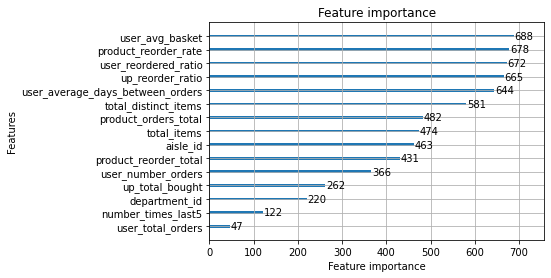

In [ ]:
#Plotting the importance of features
import matplotlib.pyplot as plt
lgb.plot_importance(lgbc)
plt.show()

In [ ]:
#Predicting
pred_lgbm = lgbc.predict(X_test_features)

In [ ]:
X_test_features['pred'] = pred_lgbm

In [ ]:
##Creating label column based on thresold
threshold = 0.20
X_test_features['label'] = np.where(X_test_features['pred'] > threshold, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
f1_gbm = f1_score(X_test_features['label'], Y_test_target)
print(f1_gbm)

0.4199722607489597


In [ ]:
#Checking thresold for predicting 1
thresold = np.arange(0.1,0.5,0.02)
f1_gbm=[]
max_f1=0
for t in thresold:
    X_test_features['label'] = np.where(X_test_features['pred'] > t, 1, 0)
    f = f1_score(X_test_features['label'],Y_test_target)
    f1_gbm.append(f)
    if f > max_f1:
        max_f1 = f
        max_t = t

max f1: 0.4199722607489597
thresold: 0.2


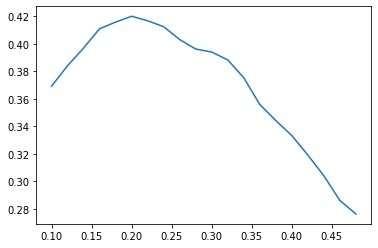

In [ ]:
plt.plot(thresold,f1_gbm)
print('max f1:',max_f1)
print('thresold:',max_t)

In [ ]:
##Grid Search to find best parameters
gridParams = {'learning_rate': [0.005,0.05,0.1], 'n_estimators': [10,40,100], 'num_leaves': [3,6,8,12], 'max_depth' : [-1,3,5]}

In [ ]:
#Training GBM model for Grid Search
best = lgb.LGBMClassifier(boosting_type= 'gbdt')

In [ ]:
#Creating the grid
from sklearn.model_selection import GridSearchCV
gridCV = GridSearchCV(best, gridParams,
                      verbose=0,
                      cv=4,
                      n_jobs=2)

In [ ]:
model = gridCV.fit(X_train_features, Y_train_target)

In [ ]:
# Store the model for prediction
model = gridCV.best_estimator_

In [ ]:
#The model has now the new parameters from GridSearchCV:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 12,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
new_features_test.head()

up_total_bought  up_reorder_ratio  ...  aisle_id  department_id
user_id product_id                                     ...                         
3       248                       1          0.090881  ...       117             19
        1005                      1          0.333252  ...        94              7
        1819                      3          0.333252  ...        88             13
        7503                      1          0.099976  ...       117             19
        8021                      1          0.090881  ...        54             17

[5 rows x 15 columns]

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.metrics import accuracy_score


In [ ]:
# First we define a set of functions to compute the metrics of the model
# ROC curve
def plot_roc(Y_test_target, X_test_features):
    fpr, tpr, thresholds = roc_curve(Y_test_target, X_test_features, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp


# Sensitivity
def custom_sensitivity_score(Y_test_target, X_test_features):
    cm = confusion_matrix(Y_test_target, X_test_features)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

    # Specificity
def custom_specificity_score(Y_test_target, X_test_features):
    cm = confusion_matrix(Y_test_target, X_test_features)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(Y_test_target, X_test_features):
    cm = confusion_matrix(Y_test_target, X_test_features)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(Y_test_target, X_test_features):
    cm = confusion_matrix(Y_test_target, X_test_features)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(Y_test_target, X_test_features):
    cm = confusion_matrix(Y_test_target, X_test_features)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

Metrics of the Light GBM model with the optimized hyper-parameters
Confusion matrix: 
[[13234   275]
 [ 1208   283]]
                                   Accuracy: 0.9011333333333333
                   SENSITIVITY (aka RECALL): 0.507168458781362
                 SPECIFICITY (aka FALL-OUT): 0.916355075474311
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.1898054996646546
                 NEGATIVE PREDICTIVE VALUE): 0.979643200829077


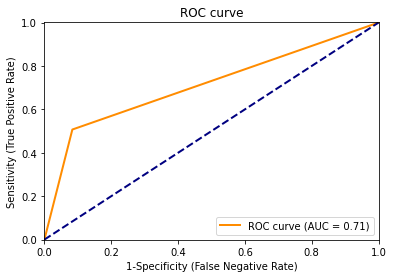

 AUC: 0.7117617671278365


In [ ]:
print('Metrics of the Light GBM model with the optimized hyper-parameters')

cm = np.transpose(confusion_matrix(X_test_features['label'], Y_test_target))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(X_test_features['label'], Y_test_target))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(X_test_features['label'], Y_test_target)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(X_test_features['label'], Y_test_target)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(X_test_features['label'], Y_test_target)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(X_test_features['label'], Y_test_target)))

plot_roc(X_test_features['label'], Y_test_target)
print(" AUC: " + str(roc_auc_score(X_test_features['label'], Y_test_target)))



Text(0.5, 1.0, 'Light GBM')

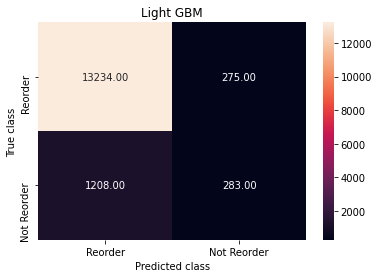

In [ ]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["Reorder", "Not Reorder"] , yticklabels = ["Reorder", "Not Reorder"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Light GBM')


#Apply Predictive Model

In [ ]:
#We set user_id and product_id as the index of the DF
new_features_test = new_features_test.set_index(['user_id', 'product_id'])
new_features_test.head()

KeyError: ignored

In [ ]:
#Predict the values for the test data and store them in a new column in the same DataFrame
#Set using a custom threshold

test_pred = (model.predict_proba(new_features_test)[:,1] >= 0.20).astype(int)
test_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
new_features_test.head()

up_total_bought  up_reorder_ratio  ...  aisle_id  department_id
user_id product_id                                     ...                         
3       248                       1          0.090881  ...       117             19
        1005                      1          0.333252  ...        94              7
        1819                      3          0.333252  ...        88             13
        7503                      1          0.099976  ...       117             19
        8021                      1          0.090881  ...        54             17

[5 rows x 15 columns]

In [ ]:
#Save the prediction on a new column in the data_test DataFrame
new_features_test['prediction'] = test_pred
new_features_test.head(n=10)

up_total_bought  ...  prediction
user_id product_id                   ...            
3       248                       1  ...           0
        1005                      1  ...           0
        1819                      3  ...           0
        7503                      1  ...           0
        8021                      1  ...           0
        9387                      5  ...           0
        12845                     1  ...           0
        14992                     2  ...           0
        15143                     1  ...           0
        16797                     3  ...           0

[10 rows x 16 columns]

In [ ]:
#Reset the index
final_predict = new_features_test.reset_index()


In [ ]:
#Keep only the required columns to create submission final
final_predict = final_predict[['product_id', 'user_id', 'prediction']]
gc.collect()
final_predict.head()

,product_id,user_id,prediction
0,248,3,0
1,1005,3,0
2,1819,3,0
3,7503,3,0
4,8021,3,0


#Create Submission File 

In [ ]:
#For each user_id in the test DataFrame, we need to get the order numbers and the products that were predicted to be purchased
orders_test = orders.loc[orders.eval_set=='test', ("user_id", "order_id")]
orders_test.head(n=10)

,user_id,order_id
38,3,2774568
44,4,329954
53,6,1528013
96,11,1376945
102,12,1356845
152,15,2161313
159,16,1416320
217,19,1735923
222,20,1980631
272,22,139655


In [ ]:
final_predict = final_predict.merge(orders_test, on='user_id', how='left')
final_predict.head()

,product_id,user_id,prediction,order_id
0,248,3,0,2774568
1,1005,3,0,2774568
2,1819,3,0,2774568
3,7503,3,0,2774568
4,8021,3,0,2774568


In [ ]:
#Drop unnecessary columns
final_predict = final_predict.drop('user_id', axis=1)

In [ ]:
#Change product_id to integer
final_predict['product_id'] = final_predict.product_id.astype(int)

In [ ]:
#Remove unecessary DataFrames
del orders
del orders_test
gc.collect()

final_predict.head()

,product_id,prediction,order_id
0,248,0,2774568
1,1005,0,2774568
2,1819,0,2774568
3,7503,0,2774568
4,8021,0,2774568


In [ ]:
#For the submission file, create a dictionary which will be used to create a map of unique keys to values.
#Index will be the order_id and the values will be the all the products that the order will have
#If none of the products will be purchased, use the string "None."

d = dict()
for row in final_predict.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final_predict.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()

#We now check how the dictionary were populated (open hidden output)
d

{2774568: '17668 18599 21903 39190 43961 47766',
 1528013: '21903 38293',
 1376945: '8309 13176 14947 27959 28465 33572 34658 35948 44632',
 1356845: '5746 7076 10863 13176 14992',
 2161313: '196 1747 10441 11266 12427 14715 27839 37710',
 1416320: '5134 17948 21137 21903 24852 28985 41950',
 1735923: '196 2192 12108 15131 17008 31487 34690 35123',
 1980631: '6184 9387 13575 13914 22362 41400 46061',
 139655: '13176 21903 22935 24964 27845 32655',
 1411408: '22008 43758',
 2940603: '10339 14947 18531 19894 30592 31615 44632',
 1192143: '8424 24852 49683',
 280888: '4595 13966 19213 32566 35413 41406',
 3202221: '4793 7781 9637 11130 13629 17630 21137 21927 24852 27966 39911 45364 45774 46979 49215',
 3222866: '7969 8501 14947 15718 18894 32441 32912 33198 34254 35921 37131 38690',
 707453: '694 4942 6111 12614 16797 18150 21267 21903 24852 25826 25931 26209 28156 32030 37766 39275 42585 42828 44142 44830 45066 45763 46802 48230',
 1320132: '22328',
 882556: '1870 5373 5450 7371 8424 90

In [ ]:
#Convert the dictionary into a DataFrame
submission = pd.DataFrame.from_dict(d, orient='index')

#Reset index
submission.reset_index(inplace=True)

#Set column names
submission.columns = ['order_id', 'products']

submission.head(n=10)

,order_id,products
0,2774568,17668 18599 21903 39190 43961 47766
1,1528013,21903 38293
2,1376945,8309 13176 14947 27959 28465 33572 34658 35948...
3,1356845,5746 7076 10863 13176 14992
4,2161313,196 1747 10441 11266 12427 14715 27839 37710
5,1416320,5134 17948 21137 21903 24852 28985 41950
6,1735923,196 2192 12108 15131 17008 31487 34690 35123
7,1980631,6184 9387 13575 13914 22362 41400 46061
8,139655,13176 21903 22935 24964 27845 32655
9,1411408,22008 43758


In [ ]:
#Check if the submission file has all 75,000 predictions
submission.shape[0]

75000

In [ ]:
#Export to CSV
submission.to_csv('submission16.csv', index=False)

In [ ]:
#Export to CSV
submission.to_csv('submission10.csv', index=False)
files.download('submission6.csv')

FileNotFoundError: ignored